# Analysis and Vizualization

The next step is to analyse the results created by OpenDC. 
When running a simulation, OpenDC generates five types of output files. 
The output folder has the following structure:

```
[1]    output 📁
[2]    ├── simple 📁
[3]    │   ├── raw-output 📁
[4]    │   │   |── 0 📁
[5]    │   │   |   └── seed=0 📁
[6]    |   |   |       └── host.parquet 📄
[7]    |   |   |       └── powerSource.parquet 📄
[8]    |   |   |       └── service.parquet 📄
[9]    |   |   |       └── task.parquet 📄
[10]   │   │   |── 1 📁
[11]   │   │   |   └── seed=0 📁
[12]   |   |   |       └── host.parquet 📄
[13]   |   |   |       └── powerSource.parquet 📄
[14]   |   |   |       └── service.parquet 📄
[15]   |   |   |       └── task.parquet 📄
[16]   |   ├── simulation-analysis 📁
[17]   |   └── trackr.json 📄
```

The output of an experiment is put inside the `output` folder, in a folder with the given experiment name. 
The output of the experiment executed in the previous part of this tutorial can be found in the folder named "simple"[2].

The output folder of an experiment consist of one file and two folders: 
- `raw-output` contains all raw output files generated during the simulation
- `simulation-analysis` contains automatic analysis done by OpenDC **Note**: this is only relevant when using M3SA and can be ignored in this tutorial
- `trackr.json` contains the parameters used in the simulations executed during the experiment. This file can be very helpful when running a large number of experiments

## 5. raw-output

The `raw-output` folder is subdivided into multiple folders, each representing a single simulation run by OpenDC. As we explained in the first part of the tutorial, users can provide multiple value for certain parameters. Consequently, OpenDC will run a simulation for each combination of parameters.

In this tutorial, we have run two simulations resulting in two folders. The `trackr` file can be used to determine which output is related to which configuration. Each simulation is divided into multiple folders depending on how many times the simulation is run. Using the `runs` parameter in the `experiment` files, a user can execute the same simulation multiple times. Each run is executed using a different random seed. This can be usefull when a simulation uses random models. 

During a simulation, multiple parquet files are created with information regarding different aspects. We advise users to use the Pandas library for reading the output files. This will make analysis and vizualization easy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_host_small = pd.read_parquet("output/simple/raw-output/0/seed=0/host.parquet")
df_powerSource_small = pd.read_parquet("output/simple/raw-output/0/seed=0/powerSource.parquet")
df_task_small = pd.read_parquet("output/simple/raw-output/0/seed=0/task.parquet")
df_service_small = pd.read_parquet("output/simple/raw-output/0/seed=0/service.parquet")

df_host_big = pd.read_parquet("output/simple/raw-output/1/seed=0/host.parquet")
df_powerSource_big = pd.read_parquet("output/simple/raw-output/1/seed=0/powerSource.parquet")
df_task_big = pd.read_parquet("output/simple/raw-output/1/seed=0/task.parquet")
df_service_big = pd.read_parquet("output/simple/raw-output/1/seed=0/service.parquet")

print(f"The small dataset has {len(df_service_small)} service samples.")
print(f"The big dataset has {len(df_service_big)} service samples.")

The small dataset has 12026 service samples.
The big dataset has 1440 service samples.


### Host

The host file contains all metrics regarding the hosts.

Examples of how to use this information:
- How much power is each host drawing?
- What is the average utilization of hosts?

In [2]:
print(f"The host file contains the following columns:\n {np.array(df_host_small.columns)}\n")
print(f"The host file consist of {len(df_host_small)} samples\n")
df_host_small.head()

The host file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'host_name' 'cluster_name' 'core_count'
 'mem_capacity' 'tasks_terminated' 'tasks_running' 'tasks_error'
 'tasks_invalid' 'cpu_capacity' 'cpu_usage' 'cpu_demand' 'cpu_utilization'
 'cpu_time_active' 'cpu_time_idle' 'cpu_time_steal' 'cpu_time_lost'
 'power_draw' 'energy_usage' 'embodied_carbon' 'uptime' 'downtime'
 'boot_time']

The host file consist of 12026 samples



,timestamp,timestamp_absolute,host_name,cluster_name,core_count,mem_capacity,tasks_terminated,tasks_running,tasks_error,tasks_invalid,...,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,power_draw,energy_usage,embodied_carbon,uptime,downtime,boot_time
0,3600000,1376318146000,H01,C01,12,140457600000,0,8,0,0,...,20173,3579827,0,0,201.169052,724034.5000,22.831051,3600000,0,1376314546000
1,7200000,1376321746000,H01,C01,12,140457600000,0,8,0,0,...,20804,3579196,0,0,201.325562,724160.9375,22.831051,3600000,0,1376314546000
2,10800000,1376325346000,H01,C01,12,140457600000,0,8,0,0,...,20156,3579844,0,0,201.158096,724031.1875,22.831051,3600000,0,1376314546000
3,14400000,1376328946000,H01,C01,12,140457600000,0,8,0,0,...,20457,3579543,0,0,201.375916,724091.3125,22.831051,3600000,0,1376314546000
4,18000000,1376332546000,H01,C01,12,140457600000,0,8,0,0,...,20021,3579979,0,0,201.159195,724004.3125,22.831051,3600000,0,1376314546000


### Tasks
The host file contains all metrics regarding the executed tasks.

Examples of how to use this information:
- When is a specific task executed?
- How long did it take to finish a task?
- On which host was a task executed?

In [3]:
print(f"The task file contains the following columns:\n {np.array(df_task_small.columns)}\n")
print(f"The task file consist of {len(df_task_small)} samples\n")
df_task_small.head()

The task file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'task_id' 'task_name' 'host_name'
 'mem_capacity' 'cpu_count' 'cpu_limit' 'cpu_usage' 'cpu_demand'
 'cpu_time_active' 'cpu_time_idle' 'cpu_time_steal' 'cpu_time_lost'
 'gpu_count' 'gpu_limit' 'gpu_usage' 'gpu_demand' 'gpu_time_active'
 'gpu_time_idle' 'gpu_time_steal' 'gpu_time_lost' 'uptime' 'downtime'
 'num_failures' 'num_pauses' 'schedule_time' 'submission_time'
 'finish_time' 'task_state']

The task file consist of 343430 samples



,timestamp,timestamp_absolute,task_id,task_name,host_name,mem_capacity,cpu_count,cpu_limit,cpu_usage,cpu_demand,...,gpu_time_steal,gpu_time_lost,uptime,downtime,num_failures,num_pauses,schedule_time,submission_time,finish_time,task_state
0,3600000,1376318146000,1152,,H01,196,1,39600.0,0.000000,0.000000,...,0,0,3600000,0,0,0,0.0,0,NaN,RUNNING
1,3600000,1376318146000,832,,,8389,2,0.0,0.000000,0.000000,...,0,0,0,0,0,0,NaN,0,NaN,PROVISIONING
2,3600000,1376318146000,449,,,8393,4,0.0,0.000000,0.000000,...,0,0,0,0,0,0,NaN,0,NaN,PROVISIONING
3,3600000,1376318146000,1026,,H01,250,1,39600.0,23.407997,23.407997,...,0,0,3600000,0,0,0,0.0,0,NaN,RUNNING
4,3600000,1376318146000,578,,,2092,1,0.0,0.000000,0.000000,...,0,0,0,0,0,0,NaN,0,NaN,PROVISIONING


### PowerSource
The task file contains all information about the power sources. 
Examples of use cases:
- What is the total energy used during the workload?

In [4]:
print(f"The task file contains the following columns:\n {np.array(df_powerSource_small.columns)}\n")
print(f"The power file consist of {len(df_powerSource_small)} samples\n")
df_powerSource_small.head()

The task file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'source_name' 'cluster_name'
 'power_draw' 'energy_usage' 'carbon_intensity' 'carbon_emission']

The power file consist of 12026 samples



,timestamp,timestamp_absolute,source_name,cluster_name,power_draw,energy_usage,carbon_intensity,carbon_emission
0,3600000,1376318146000,PowerSource,C01,201.169052,724034.5000,0.0,0.0
1,7200000,1376321746000,PowerSource,C01,201.325562,724160.9375,0.0,0.0
2,10800000,1376325346000,PowerSource,C01,201.158096,724031.1875,0.0,0.0
3,14400000,1376328946000,PowerSource,C01,201.375916,724091.3125,0.0,0.0
4,18000000,1376332546000,PowerSource,C01,201.159195,724004.3125,0.0,0.0


### Service

The service file contains genaral information about the experiments. 

Example use cases of this file:
- How many tasks are running?
- How many hosts are active?

In [5]:
print(f"The service file contains the following columns:\n {np.array(df_service_small.columns)}\n")
print(f"The service file consist of {len(df_service_small)} samples\n")
df_service_small.head()

The service file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'hosts_up' 'hosts_down' 'tasks_total'
 'tasks_pending' 'tasks_active' 'tasks_completed' 'tasks_terminated']

The service file consist of 12026 samples



,timestamp,timestamp_absolute,hosts_up,hosts_down,tasks_total,tasks_pending,tasks_active,tasks_completed,tasks_terminated
0,3600000,1376318146000,1,0,44,36,8,0,0
1,7200000,1376321746000,1,0,44,36,8,0,0
2,10800000,1376325346000,1,0,44,36,8,0,0
3,14400000,1376328946000,1,0,44,36,8,0,0
4,18000000,1376332546000,1,0,44,36,8,0,0


## 6. Aggregating Ouput

To get a better understanding of the experiment output, we would like to aggregate them into single values. 
This will also allow us to determine the differences between the two datacenter sizes.

We want to compare the two simulations in the following three aspects:
- `runtime`
- `average utilization`
- `energy usage`

### Runtime

In [6]:
# Getting the end time of the simulation, and thus the runtime
runtime_small = df_service_small["timestamp"].max()
runtime_big = df_service_big["timestamp"].max()

# Converting the runtime from ms to timedelta
runtime_small_td = pd.to_timedelta(runtime_small, unit='ms')
runtime_big_td = pd.to_timedelta(runtime_big, unit='ms')

# Printing the results 
print(f"The runtime of the small datacenter is {runtime_small_td} hours")
print(f"The runtime of the big datacenter is {runtime_big_td} hours")

The runtime of the small datacenter is 501 days 01:53:08 hours
The runtime of the big datacenter is 59 days 23:44:48 hours


Using a larger datacenter allows for paralel execution of tasks, and thus a much smaller runtime.

### Power Draw

In [7]:
# Getting the end time of the simulation, and thus the runtime
runtime_small = df_host_small["cpu_utilization"].mean()
runtime_big = df_host_big["cpu_utilization"].mean()

# Convert utlization to percentage
runtime_small = runtime_small * 100
runtime_big = runtime_big * 100

# Printing the results
print(f"The average CPU utilization of the small datacenter is {runtime_small:.2f} %")
print(f"The average CPU utilization of the big datacenter is {runtime_big:.2f} %")

The average CPU utilization of the small datacenter is 11.84 %
The average CPU utilization of the big datacenter is 10.96 %


As expected, the average utilization of the big datacenter is lower than that of the smaller datacenter.

### Energy Usage

In [8]:
# Get the total energy usage during the simulation
energy_small = df_powerSource_small["energy_usage"].sum()
energy_big = df_powerSource_big["energy_usage"].sum()

# Convert energy to kWh
energy_small = energy_small / 3_600_000
energy_big = energy_big / 3_600_000

# Printing the results
print(f"The total energy usage of the small datacenter is {energy_small:.2f} kWh")
print(f"The total energy usage of the big datacenter is {energy_big:.2f} kWh")

The total energy usage of the small datacenter is 2690.83 kWh
The total energy usage of the big datacenter is 2876.43 kWh


Surprisingly, the big data center uses more energy than the small datacenter, eventhough its runtime is almost 10 times smaller. This is caused by the high number of hosts still drawing power, even when idle.

## 7. Vizualization

To getting even more insight into the results, we can plot the results. 


### Active tasks
First we plot the number of active tasks during the workload

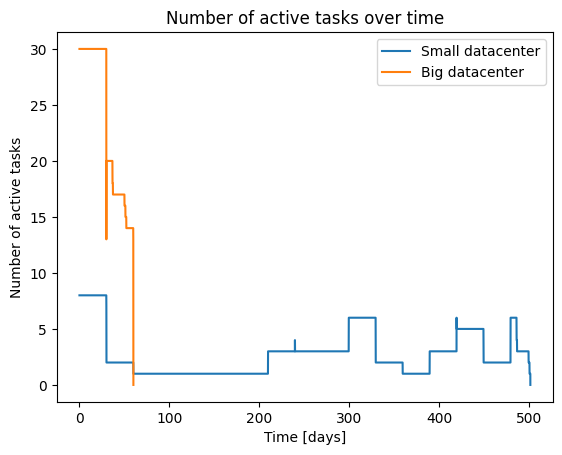

In [9]:
plt.plot(df_service_small["timestamp"]/3_600_000 / 24, df_service_small["tasks_active"], label="Small datacenter")
plt.plot(df_service_big["timestamp"]/3_600_000 / 24, df_service_big["tasks_active"], label="Big datacenter")
plt.xlabel("Time [days]")
plt.ylabel("Number of active tasks")
plt.title("Number of active tasks over time")
plt.legend()

Because of its size, the big datacenter is able to run up to 30 tasks in parallel. In contrast, the small datacenter cannot run more than 8 tasks.

### Energy Usage

Below we show the energy usage over time for the two data centers.  

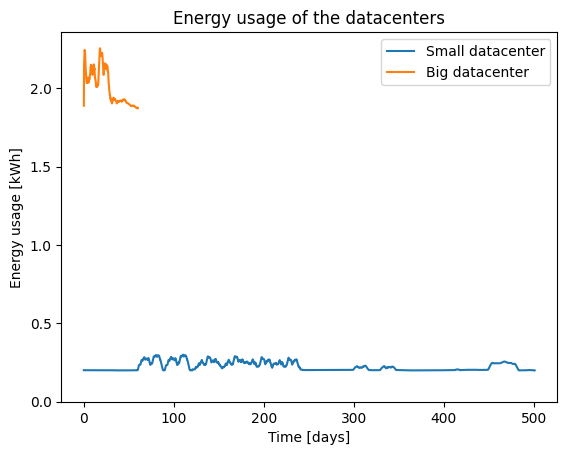

In [10]:
# Sum the energy usage of each power source at each timestamp
energy_usage_big = df_powerSource_big.groupby("timestamp")["energy_usage"].sum()

# Compute a windowed (rolling) average of energy usage with a window size of 50 samples
window_size = 100
energy_usage_small_rolling = df_powerSource_small["energy_usage"].rolling(window=window_size, min_periods=1).mean()
energy_usage_big_rolling = energy_usage_big.rolling(window=window_size, min_periods=1).mean()

plt.plot(df_powerSource_small["timestamp"] / 3_600_000 / 24, energy_usage_small_rolling / 3_600_000, label="Small datacenter")
plt.plot(energy_usage_big_rolling.index / 3_600_000 / 24, energy_usage_big_rolling / 3_600_000, label="Big datacenter")
plt.xlabel("Time [days]")
plt.ylabel("Energy usage [kWh]")
plt.title("Energy usage of the datacenters")
plt.ylim([0, None])
plt.legend()

Because of its size, the big datacenter is using a lot more energy compared to the small datacenter.